In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivam2503/diamonds")

print("Path to dataset files:", path)

100%|██████████| 733k/733k [00:00<00:00, 1.18MB/s]

Extracting model files...
Path to dataset files: /Users/gres1/.cache/kagglehub/datasets/shivam2503/diamonds/versions/1


Creating a Dataframe , Checking for Basic Info & displaying the Head of the Dataset

In [8]:
import kagglehub
import pandas as pd

# Download latest version of the dataset
path = kagglehub.dataset_download("shivam2503/diamonds")
print("Path to dataset files:", path)

# Load the CSV file
df = pd.read_csv(f"{path}/diamonds.csv")

# Show first 10 rows
print(df.head(10))

# Check basic info
print(df.info())

# Summary statistics
print(df.describe())

#Show the last 10 rows
print(df.tail(10))


Path to dataset files: /Users/gres1/.cache/kagglehub/datasets/shivam2503/diamonds/versions/1
   Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0           1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1           2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2           3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3           4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4           5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5           6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
6           7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
7           8   0.26  Very Good     H     SI1   61.9   55.0    337  4.07   
8           9   0.22       Fair     E     VS2   65.1   61.0    337  3.87   
9          10   0.23  Very Good     H     VS1   59.4   61.0    338  4.00   

      y     z  
0  3.98  2.43  
1  3.84  2.31  
2  4.07  2.31  
3  4.2

Dataset Length

In [6]:
# Dataset length
print("Number of rows:", len(df))
print("Shape (rows, columns):", df.shape)


Number of rows: 53940
Shape (rows, columns): (53940, 11)


R² score: 0.9955858565742897


[Text(0.5, 0.9, 'carat <= 0.995\nsquared_error = 16051042.567\nsamples = 37758\nvalue = 3951.495'),
 Text(0.25, 0.7, 'y <= 5.525\nsquared_error = 1254082.096\nsamples = 24406\nvalue = 1636.191'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'y <= 4.995\nsquared_error = 270684.344\nsamples = 17411\nvalue = 1057.883'),
 Text(0.0625, 0.3, 'x <= 4.625\nsquared_error = 57464.944\nsamples = 12230\nvalue = 788.955'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Unnamed: 0 <= 46398.5\nsquared_error = 200285.523\nsamples = 5181\nvalue = 1692.7'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Unnamed: 0 <= 27909.5\nsquared_error = 797367.349\nsamples = 6995\nvalue = 3075.639'),
 Text(0.3125, 0.3, 'Unnamed: 0 <= 5590.5\nsquared_error = 547078.866\nsamples = 4032\nvalue = 3644.682'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Unnamed: 0 <= 50138

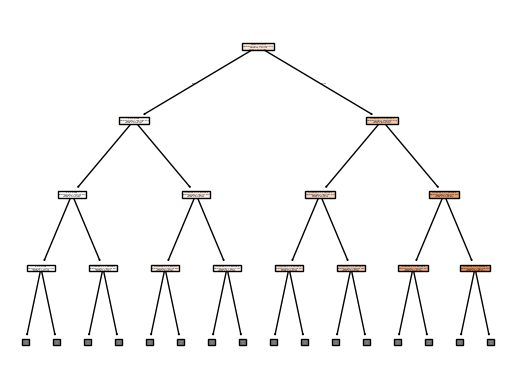

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Features (everything except 'price')
X = df_encoded.drop('price', axis=1)

# Target variable (price)
y = df_encoded['price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Decision Tree model
clf = DecisionTreeRegressor(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

# Predictions & score
y_pred = clf.predict(X_test)
print("R² score:", r2_score(y_test, y_pred))

# Optional: visualize the tree
plot_tree(clf, feature_names=X.columns, filled=True, max_depth=3)


In [11]:
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Download dataset
path = kagglehub.dataset_download("shivam2503/diamonds")
df = pd.read_csv(f"{path}/diamonds.csv")

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
clf = DecisionTreeRegressor(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Regression metrics
print("R² score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² score: 0.9955858565742897
Mean Absolute Error: 182.45845798437443
Root Mean Squared Error: 262.3791514576229


2 Bar Charts including the Carats & Diamond Prices

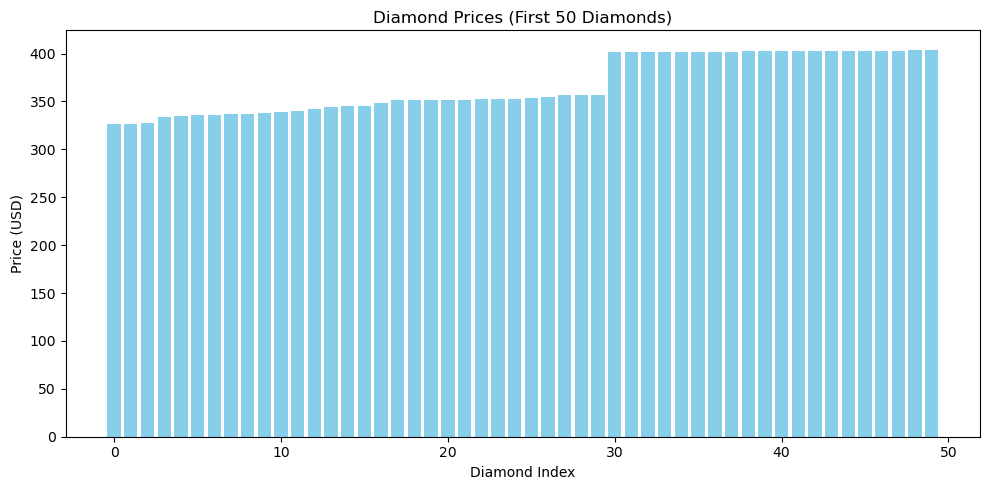

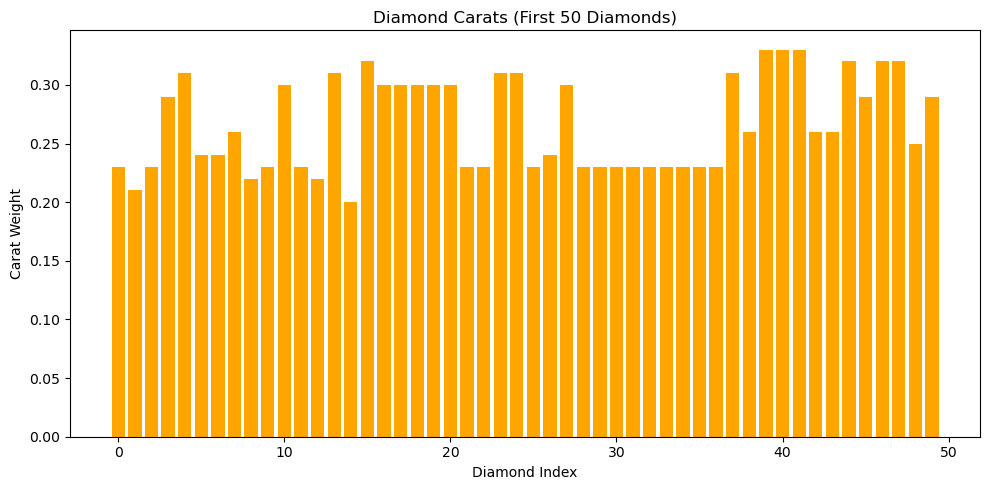

In [13]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

# Download dataset
path = kagglehub.dataset_download("shivam2503/diamonds")
df = pd.read_csv(f"{path}/diamonds.csv")

# For readability, let's just take the first 50 diamonds
df_sample = df.head(50)

# Price bar chart
plt.figure(figsize=(10,5))
plt.bar(df_sample.index, df_sample['price'], color='skyblue')
plt.title('Diamond Prices (First 50 Diamonds)')
plt.xlabel('Diamond Index')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()

# Carat bar chart
plt.figure(figsize=(10,5))
plt.bar(df_sample.index, df_sample['carat'], color='orange')
plt.title('Diamond Carats (First 50 Diamonds)')
plt.xlabel('Diamond Index')
plt.ylabel('Carat Weight')
plt.tight_layout()
plt.show()
